The objective of this notebook is to perform exploratory data analysis (EDA) on the stores sales forecasting dataset. The EDA will include:

- Identifying and handling missing values
- Removing duplicates
- Detecting and encoding categorical variables
- Detecting and addressing outliers
- Detecting the temporal aspect of the data, especially for time series forecasting tasks
- SHAPLEY values can be used to interpret the impact of each feature on the model's predictions, providing insights into feature importance and interactions.
- Permutation importance can be used to assess the importance of features by measuring the change in model performance when a feature's values are randomly shuffled.

In [53]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
base_path = pathlib.Path().resolve().parents[0]
data_path = base_path / 'data/stores_sales_forecasting.csv'

In [55]:
try:
    df = pd.read_csv(data_path)
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    df = pd.read_csv(data_path, encoding='ISO-8859-1')


Error reading the CSV file: 'utf-8' codec can't decode byte 0xd2 in position 17654: invalid continuation byte


In [56]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

## My understanding of the dataset

- Categorical features: Customer ID, Ship Mod, Segment, Country, City, State, Postal Code, Region, Category, Sub-Category, e, City
- Numerical features: Sales, Quantity, Profit, Discount
- Date feature: Order Date, Shipping Date

In [58]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


## Create Original Price

Original price can be calculated from the sales, quantity, and the discount applied.

In [59]:
df['Unit Sales Price'] = df['Sales'] / df['Quantity']
df['Original Price'] = df['Unit Sales Price'] / (1 - df['Discount'])

## observation

    - can a product be sold in different segemnets? YES

# Detect Missing Values and Duplicates

In [60]:
nulls = df.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

Text(0.5, 1.0, 'Profit Distribution')

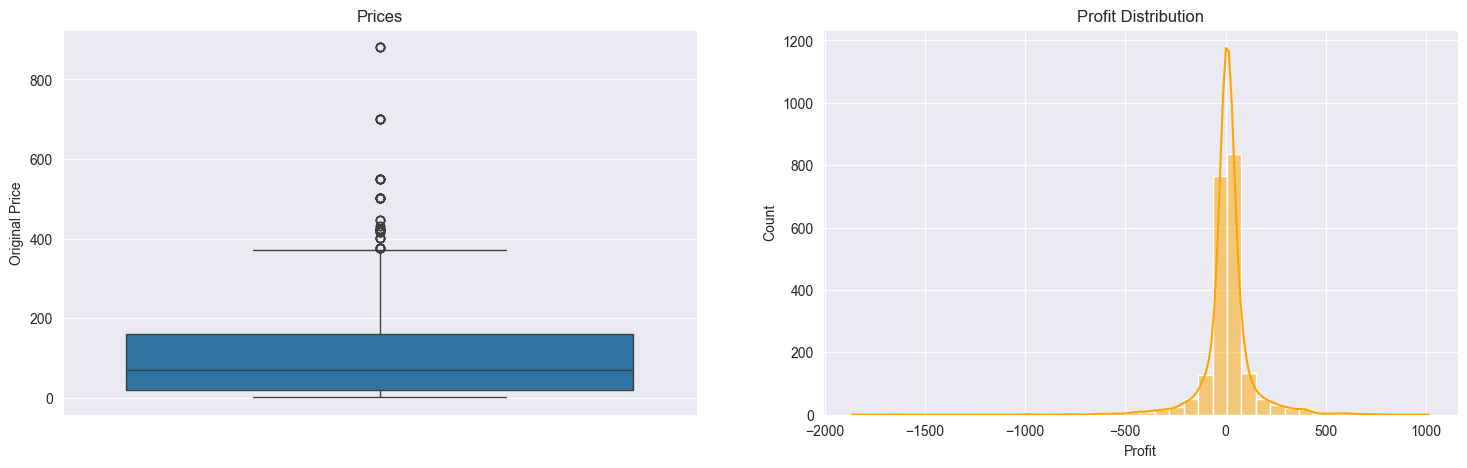

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

# Boxplot of Sales
sns.boxplot(y=df['Original Price'], ax=axs[0])
axs[0].set_title("Prices")

# Histogram of Profit
sns.histplot(df['Profit'], bins=40, kde=True, ax=axs[1], color='orange')
axs[1].set_title("Profit Distribution")

# Categorical variables

In [62]:
categorical_cols = df.select_dtypes(include='object').columns

In [63]:
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()}")

Order ID: 1764
Order Date: 889
Ship Date: 960
Ship Mode: 4
Customer ID: 707
Customer Name: 707
Segment: 3
Country: 1
City: 371
State: 48
Region: 4
Product ID: 375
Category: 1
Sub-Category: 4
Product Name: 380


In [64]:
df['Segment'].value_counts()

Segment
Consumer       1113
Corporate       646
Home Office     362
Name: count, dtype: int64

In [65]:
assert df['City'].str.lower().nunique() == df['City'].nunique()

In [66]:
df['Region'].value_counts()

Region
West       707
East       601
Central    481
South      332
Name: count, dtype: int64

In [67]:
df['Sub-Category'].value_counts()

Sub-Category
Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: count, dtype: int64

In [68]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: count, dtype: int64

In [69]:
df['Product ID'].nunique()

375

# Date and Time Features

- Converting date column into datetime format
- Converting the actual dates into (year, month, weekofyear)
- Encoding cyclical features for month and day of week

We can observe seasoality in the data by encoding the month and day of week as cyclical features.

In [70]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Year'] = df['Order Date'].dt.year
df['_Month'] = df['Order Date'].dt.month
df['_WeekOfYear'] = df['Order Date'].dt.isocalendar().week
df['_DayOfWeek'] = df['Order Date'].dt.dayofweek

# Cyclical encoding for month and day of week
df['Month_sin'] = np.sin(2 * np.pi * df['_Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['_Month'] / 12)

df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['_DayOfWeek'] / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['_DayOfWeek'] / 7)
df['WeekOfYear_sin'] = np.sin(2 * np.pi * df['_WeekOfYear'] / 53)
df['WeekOfYear_cos'] = np.cos(2 * np.pi * df['_WeekOfYear'] / 53)

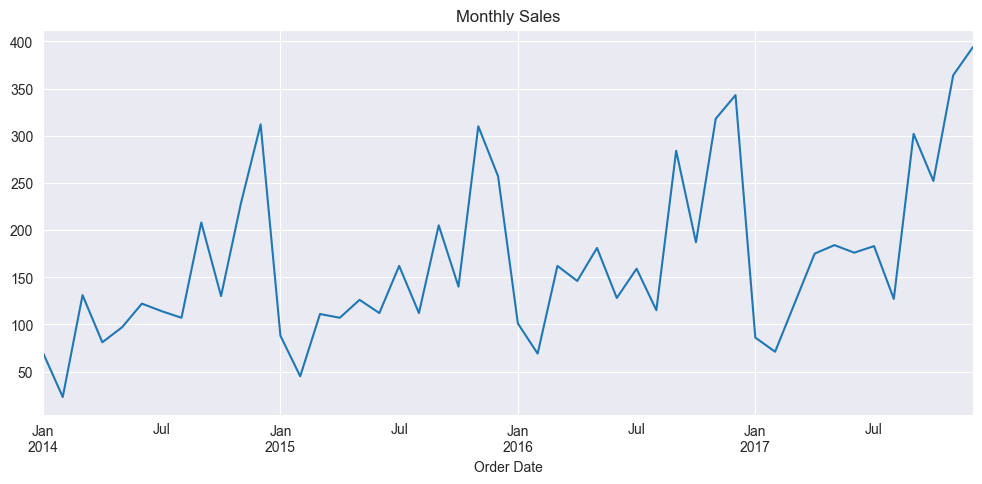

In [71]:
# Resample to monthly and calculate the sum
df.set_index('Order Date',  inplace=True)
monthly_sales = df['Quantity'].resample('ME').sum()

monthly_sales.plot(figsize=(12, 5), title='Monthly Sales')
plt.show()

In [72]:
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Year,_Month,_WeekOfYear,_DayOfWeek,Month_sin,Month_cos,DayOfWeek_sin,DayOfWeek_cos,WeekOfYear_sin,WeekOfYear_cos
Order Date,,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,2016,11,45,1,-5.000000e-01,0.866025,0.781831,0.62349,-0.812487,0.582979
2016-11-08,2,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,2016,11,45,1,-5.000000e-01,0.866025,0.781831,0.62349,-0.812487,0.582979
2015-10-11,4,US-2015-108966,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,2015,10,41,6,-8.660254e-01,0.500000,-0.781831,0.62349,-0.98904,0.147647
2014-06-09,6,CA-2014-115812,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,2014,6,24,0,1.224647e-16,-1.000000,0.000000,1.00000,0.292057,-0.956401
2014-06-09,11,CA-2014-115812,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,2014,6,24,0,1.224647e-16,-1.000000,0.000000,1.00000,0.292057,-0.956401


Text(0.5, 80.7222222222222, 'Day of Week (0 = Monday)')

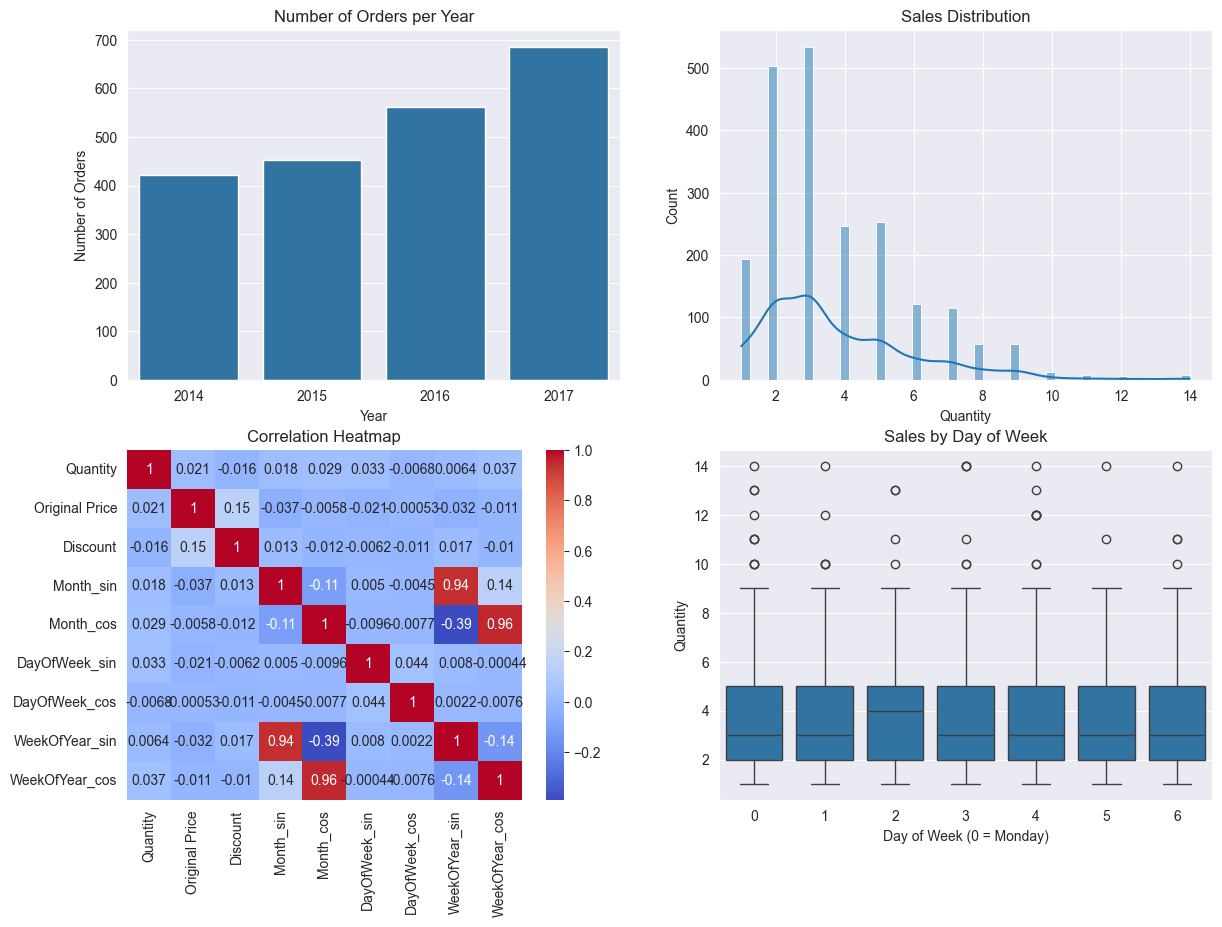

In [73]:
orders_per_year = df['Year'].value_counts().sort_index()

sales_quantity_distribution = df['Quantity']

# Correlation matrix for numerical features
corr_matrix = df[['Quantity', 'Original Price', 'Discount', 'Month_sin', 'Month_cos', 'DayOfWeek_sin', 'DayOfWeek_cos', 'WeekOfYear_sin', 'WeekOfYear_cos']].corr()

# Prepare plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Orders per year
sns.barplot(x=orders_per_year.index, y=orders_per_year.values, ax=axs[0, 0])
axs[0, 0].set_title("Number of Orders per Year")
axs[0, 0].set_ylabel("Number of Orders")

# Plot 2: Sales distribution
sns.histplot(sales_quantity_distribution, bins=50, kde=True, ax=axs[0, 1])
axs[0, 1].set_title("Sales Distribution")

# Plot 3: Correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title("Correlation Heatmap")

# Plot 4: Sales by day of week
sns.boxplot(x='_DayOfWeek', y='Quantity', data=df, ax=axs[1, 1])
axs[1, 1].set_title("Sales by Day of Week")
axs[1, 1].set_xlabel("Day of Week (0 = Monday)")

## Observations

- This shows that different days of the week have almost similar patterns
- There is not a large correlation between the numerical features and the TARGET COLUMN (Quantity)


In [74]:
df['Quantity'].describe()

count    2121.000000
mean        3.785007
std         2.251620
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64